In [15]:
from google.colab import files 
uploaded = files.upload()

Saving 202012-capitalbikeshare-tripdata.csv to 202012-capitalbikeshare-tripdata.csv


In [116]:
import pandas as pd 
import io 
import fbprophet as Prophet
  
df = pd.read_csv(io.BytesIO(uploaded['202012-capitalbikeshare-tripdata.csv']), index_col='started_at', parse_dates=True) 
print(df.head(3))

                              ride_id rideable_type  ...    end_lng member_casual
started_at                                           ...                         
2020-12-02 09:10:36  C04E20007D039277   docked_bike  ... -77.041539        casual
2020-12-31 12:46:29  A488C0D9F4761D06  classic_bike  ... -77.038325        casual
2020-12-31 12:47:03  9E7E97A927A85552  classic_bike  ... -77.038325        casual

[3 rows x 12 columns]


In [117]:
print(df.columns)

Index(['ride_id', 'rideable_type', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual'],
      dtype='object')


In [118]:
df['rides'] = 1

In [119]:
df_ride_predict = df
df_ride_predict = df_ride_predict.drop(['ride_id', 'rideable_type', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'], axis = 1)
print(df_ride_predict.head(3))

                     rides
started_at                
2020-12-02 09:10:36      1
2020-12-31 12:46:29      1
2020-12-31 12:47:03      1


In [120]:
df_ride_predict = df_ride_predict.resample('H').rides.sum()

In [135]:
df_ride_predict = df_ride_predict.reset_index()

In [136]:
df_ride_predict.columns = ['ds', 'y']

In [137]:
df_ride_predict.head(3)

,ds,y
0,2020-12-01 00:00:00,27
1,2020-12-01 01:00:00,16
2,2020-12-01 02:00:00,10


In [138]:
#m = Prophet()
m = Prophet.Prophet()
m.fit(df_ride_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [139]:
future = m.make_future_dataframe(periods=31)
future.tail()

,ds
770,2021-01-27 23:00:00
771,2021-01-28 23:00:00
772,2021-01-29 23:00:00
773,2021-01-30 23:00:00
774,2021-01-31 23:00:00


In [140]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
770,2021-01-27 23:00:00,214.885747,52.457877,361.243261
771,2021-01-28 23:00:00,232.206140,75.291541,395.023529
772,2021-01-29 23:00:00,257.180685,89.330259,418.447279
773,2021-01-30 23:00:00,314.475481,148.860188,478.336223
774,2021-01-31 23:00:00,268.113432,88.124883,439.301536


In [141]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-12-01 00:00:00,34.166356,-63.970495,134.366582
1,2020-12-01 01:00:00,23.378355,-82.151760,132.121334
2,2020-12-01 02:00:00,11.334558,-97.679468,115.871600
3,2020-12-01 03:00:00,5.657446,-95.682859,104.397622
4,2020-12-01 04:00:00,13.860425,-82.717164,113.226484
...,...,...,...,...
770,2021-01-27 23:00:00,214.885747,52.457877,361.243261
771,2021-01-28 23:00:00,232.206140,75.291541,395.023529
772,2021-01-29 23:00:00,257.180685,89.330259,418.447279
773,2021-01-30 23:00:00,314.475481,148.860188,478.336223


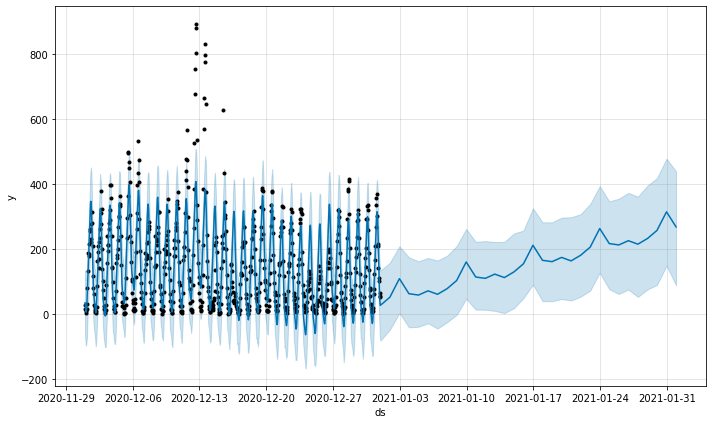

In [142]:

# Python
fig1 = m.plot(forecast)

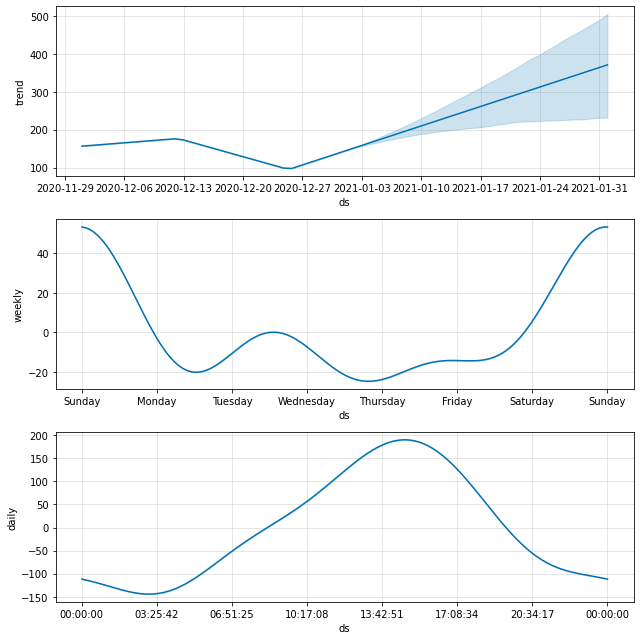

In [143]:
fig2 = m.plot_components(forecast)

In [144]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [145]:
plot_components_plotly(m, forecast)